Import Necessary Libraries

In [212]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# ETL (Extract, Transform, Load)

## Load and explore the dataset

### Geothermal Gradients Dataset

In [213]:
gradients = pd.read_excel('data/Anexo 1. GRADIENTES GEOTÉRMICOS APARENTES.xlsx',sheet_name=1)
gradients = gradients.rename(columns={"Longitud": "Lon", "Latitud": "Lat"})
gradients.head()

,UWI,Nombre del Pozo,Profundidad Total \n(ft),Departamento,Cuenca,Lat,Lon,Coordenada\nX,Coordenada \n Y,Elevación GL\n(ft),Elevacion \n(m),Temperatura en superficie \n(°C),BHT\n(°F),BHT\n(°C),Profundidad BHT\n(ft),Profundidad BHT \n(m),Temperatura de formación (°C),Gradiente Geotérmico Aparente (°C/Km),Año de actualizacion del dato
0,ABAN0004,ABANICO-4,3020,Tolima,Valle Superior del Magdalena,4.213002,-74.893581,909770.865223,957357.370043,1030.0,313.9440,26.630280,100.0,37.777778,3020.0,920.4960,40.172876,14.712281,2008.0
1,ABAN0005,ABANICO-5,2928,Tolima,Valle Superior del Magdalena,4.216078,-74.888898,910291.244350,957696.956787,1028.0,313.3344,26.633328,110.0,43.333333,2928.0,892.4544,45.637603,21.294394,2008.0
2,ABAN0006,ABANICO-6,2904,Tolima,Valle Superior del Magdalena,4.214720,-74.891220,910033.263457,957547.084087,1038.0,316.3824,26.618088,113.0,45.000000,2842.0,866.2416,47.220262,23.783404,2008.0
3,ACAE0001,ACAE-1,10578,Putumayo,Caguan-Putumayo,0.606276,-76.564731,723420.331087,558549.884585,903.0,275.2344,26.823828,200.0,93.333333,10573.0,3222.6504,104.671211,24.156323,2008.0
4,ACAE0010,ACAE-10,10757,Putumayo,Caguan-Putumayo,0.305911,-76.914853,684390.184013,525315.148844,297.0,90.5256,27.747372,159.0,70.555556,6268.0,1910.4864,76.658202,25.601245,2008.0


### Moho Depth Dataset

In [214]:
moho_depth = pd.read_csv('data/south-american-moho.txt', delim_whitespace=True, comment="#", header=None, names=["Latitude", "Longitude", "Moho Depth (m)"])
moho_depth = moho_depth.rename(columns={"Longitude": "Lon", "Latitude": "Lat"})
moho_depth.head()

,Lat,Lon,Moho Depth (m)
0,-60.0,270.0,32674.89851
1,-60.0,270.4,26702.16351
2,-60.0,270.8,23617.60412
3,-60.0,271.2,22474.44981
4,-60.0,271.6,22003.43619


### Volcanos

In [215]:
volcanos = pd.read_csv('data/Volcanes_col.csv')
volcanos = volcanos.rename(columns={"X": "Lon", "Y": "Lat"})
volcanos.head()

,Lon,Lat,OBJECTID,VolcanID,NombreVolcan,AlturaSobreNivelMar,Latitud,Longitud,Comentarios,URL,GlobalID
0,-76.214977,1.916518,1,NaN,NaN,1800.0,"1° 54' 59,465"" N","76° 12' 53,917"" W",Edificio volcánico en el municipio de Isnos en...,NaN,071b82b6-5b8a-47d0-ba87-5ebfd34e4bac
1,-76.166495,2.232286,2,NaN,Volcan Santa Leticia,NaN,"2° 13' 56,229"" N","76° 9' 59,382"" W",NaN,NaN,f5a4cc3d-fc7e-46a1-b8d9-69fdcb4a541a
2,-76.082576,2.179546,3,NaN,Volcán El Pensil,2200.0,"2° 10' 46,366"" N","76° 4' 57,273"" W",NaN,NaN,e09ff266-bee3-4ea4-98df-8765b2c0b164
3,-76.217778,2.110280,4,NaN,Volcán El Dorado,2000.0,"2° 6' 37,008"" N","76° 13' 4,001"" W",NaN,NaN,073bdc7f-d632-4954-a383-cc1d4d083b7c
4,-76.477694,2.240949,5,NaN,Maar de Yerbabuena,3100.0,"2° 14' 27,415"" N","76° 28' 39,697"" W",NaN,NaN,d6077acc-cac2-4c9b-be59-64ba98040e8a


### Geologic data, porosity and heat flow

In [216]:
heat_flow = pd.read_excel('data/ANEXO I_Tabla de calculo de flujo de calor.xlsx')
heat_flow

,Identificador Único de Pozo\n(UWI),Nombre del Pozo,Coordenada \nX,Coordenada \nY,Tope \n(m),Base \n(m),Espesor \n(m),Formación Géologica o Edad,Litología dominante,Conductividad térmica de la matriz\nλm \n(Wm-1K-1)\n,Porosidad efectiva Φ\n (v/v),Gradiente aparente (°C/Km),Temperatura promedio del espesor litológico \nTz\n(°C),"Conductividad térmica corregida a la temperatura Tz\nλm, T° \n(Wm-1K-1)","Conductividad térmica del agua corregida a Tz\nλH2O, T° \n(Wm-1K-1)",Conductividad térmica de la roca saturada en agua \nin situ \nλ(m+H2O) \n(Wm-1K-1),Resistividad térmica acumulada (RTA) \n (Z / λ(m+H2O) \nin situ \n(m. mKW-1),Conductividad térmica efectiva λ (Zmax/Σ RTA)\n(Wm-1K-1),Flujo de calor \nQBHT\n (mW m-2)
0,AGUL0001,Agualinda-1,1.330987e+06,1.175295e+06,0.0000,463.2960,463.2960,Guayabo,Limolitas,1.63,0.2400,22.40,32.188915,1.564900,0.617759,1.252005,370.043116,1.293452,28.973316
1,AGUL0001,Agualinda-1,1.330987e+06,1.175295e+06,463.2960,975.3600,512.0640,Guayabo,Arcillolitas,1.26,0.1600,22.40,43.112947,1.167874,0.632326,1.058676,483.683391,1.293452,28.973316
2,AGUL0001,Agualinda-1,1.330987e+06,1.175295e+06,975.3600,1127.7600,152.4000,Guayabo,Limolitas,1.63,0.2400,22.40,50.554944,1.476071,0.641261,1.208398,126.117432,1.293452,28.973316
3,AGUL0001,Agualinda-1,1.330987e+06,1.175295e+06,1127.7600,1511.8080,384.0480,Guayabo,Arcillolitas,1.26,0.1600,22.40,56.563162,1.120210,0.647891,1.026247,374.225719,1.293452,28.973316
4,AGUL0001,Agualinda-1,1.330987e+06,1.175295e+06,1511.8080,1645.9200,134.1120,León,Arcillolitas,1.37,0.0330,22.40,62.366554,1.196929,0.653799,1.173280,114.305151,1.293452,28.973316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,CRON0001,Caño Rondón-1,1.301904e+06,1.236109e+06,2968.7520,3048.0000,79.2480,Mirador,Arenitas,2.76,0.1399,22.83,95.681224,2.193440,0.678290,1.861304,42.576609,1.289098,29.430112
1042,CRON0001,Caño Rondón-1,1.301904e+06,1.236109e+06,3048.0000,3158.9472,110.9472,Guadalupe,Arenitas,4.11,0.1585,22.83,97.852302,3.247196,0.679329,2.534073,43.782166,1.289098,29.430112
1043,CRON0001,Caño Rondón-1,1.301904e+06,1.236109e+06,3158.9472,3260.1408,101.1936,Gachetá,Arenitas,3.37,0.1778,22.83,100.273890,2.645269,0.680408,2.077883,48.700331,1.289098,29.430112
1044,CRON0001,Caño Rondón-1,1.301904e+06,1.236109e+06,3260.1408,3337.5600,77.4192,Une,Arenitas,3.83,0.1433,22.83,102.312755,2.990013,0.681250,2.418922,32.005656,1.289098,29.430112


## Data Preprocessing

### Moho Depth

We need to convert the Longitude from 0, 360° to -180°, 180°

In [217]:
moho_depth["Lon"] = moho_depth["Lon"].apply(lambda x: x - 360 if x > 180 else x)

moho_depth.head()

,Lat,Lon,Moho Depth (m)
0,-60.0,-90.0,32674.89851
1,-60.0,-89.6,26702.16351
2,-60.0,-89.2,23617.60412
3,-60.0,-88.8,22474.44981
4,-60.0,-88.4,22003.43619


Crop the moho_depth dataset so that it fits within the spatial extent of the first dataset (geothermal gradient).

In [218]:
# Define the spatial extent boundaries from the "gradients" dataset
min_lat = gradients["Lat"].min()
max_lat = gradients["Lat"].max()
min_lon = gradients["Lon"].min()
max_lon = gradients["Lon"].max()

# Crop the "moho_depth" dataset to fit within the spatial extent of the "gradients" dataset
moho_depth= moho_depth[
    (moho_depth["Lat"] >= min_lat) & (moho_depth["Lat"] <= max_lat) &
    (moho_depth["Lon"] >= min_lon) & (moho_depth["Lon"] <= max_lon)
]

moho_depth.head()

,Lat,Lon,Moho Depth (m)
22830,0.4,-78.4,45833.63750
22831,0.4,-78.0,50558.10643
22832,0.4,-77.6,50195.81961
22833,0.4,-77.2,43388.77930
22834,0.4,-76.8,37111.13688


In [219]:
missing_values = moho_depth.isnull().sum()
missing_values

Lat               0
Lon               0
Moho Depth (m)    0
dtype: int64

### Gradients

In [220]:
# Check for missing values
missing_values = gradients.isnull().sum()
missing_values

UWI                                       32
Nombre del Pozo                           30
Profundidad Total \n(ft)                  33
Departamento                              38
Cuenca                                    38
Lat                                      100
Lon                                      100
Coordenada\nX                             38
Coordenada \n Y                           38
Elevación GL\n(ft)                       444
Elevacion \n(m)                           38
Temperatura en superficie \n(°C)          38
BHT\n(°F)                                 38
BHT\n(°C)                                 38
Profundidad BHT\n(ft)                     38
Profundidad BHT \n(m)                     38
Temperatura de formación (°C)             38
Gradiente Geotérmico Aparente (°C/Km)     38
Año de actualizacion del dato             38
dtype: int64

Remove rows without geothermal gradient, latitude or longitude values

In [221]:
gradients = gradients.dropna(subset=["Gradiente Geotérmico Aparente (°C/Km)"])
gradients = gradients.dropna(subset=["Lat", "Lon"])

gradients.tail()

,UWI,Nombre del Pozo,Profundidad Total \n(ft),Departamento,Cuenca,Lat,Lon,Coordenada\nX,Coordenada \n Y,Elevación GL\n(ft),Elevacion \n(m),Temperatura en superficie \n(°C),BHT\n(°F),BHT\n(°C),Profundidad BHT\n(ft),Profundidad BHT \n(m),Temperatura de formación (°C),Gradiente Geotérmico Aparente (°C/Km),Año de actualizacion del dato
4600,ZENO0001,ZENON-1,6422,Bolivar,Valle Inferior del Magdalena,9.198753,-74.545831,9.489047e+05,1.508724e+06,49.0,14.9352,28.125324,152.0,66.666667,6423.0,1957.7304,72.962956,22.902864,2008.0
4601,ZENO0002,ZENON-2,6196,Bolivar,Valle Inferior del Magdalena,9.193783,-74.545203,9.489730e+05,1.508175e+06,58.0,17.6784,28.111608,152.0,66.666667,6196.0,1888.5408,72.679641,23.599190,2008.0
4602,ZENO0003,ZENON-3,6559,Magdalena,Valle Inferior del Magdalena,9.210378,-74.266786,9.795733e+05,1.509982e+06,70.0,21.3360,28.093320,152.0,66.666667,6559.0,1999.1832,73.133462,22.529272,2008.0
4603,ZULI0001W,ZULIA WEST-1,7655,Norte de Santander,Catatumbo,8.213381,-72.470731,1.177448e+06,1.400064e+06,285.0,86.8680,27.765660,166.0,74.444444,7765.0,2366.7720,82.434751,23.098588,2008.0
4604,ZULI0001E,ZULIA-1 EAST,3361.5,Norte de Santander,Catatumbo,8.202650,-72.439292,1.180919e+06,1.398891e+06,NaN,114.0000,27.630000,112.0,44.444444,3410.0,1039.3680,47.235248,18.862662,2008.0


In [222]:
missing_values = gradients.isnull().sum()
missing_values

UWI                                        0
Nombre del Pozo                            0
Profundidad Total \n(ft)                   0
Departamento                               0
Cuenca                                     0
Lat                                        0
Lon                                        0
Coordenada\nX                              0
Coordenada \n Y                            0
Elevación GL\n(ft)                       348
Elevacion \n(m)                            0
Temperatura en superficie \n(°C)           0
BHT\n(°F)                                  0
BHT\n(°C)                                  0
Profundidad BHT\n(ft)                      0
Profundidad BHT \n(m)                      0
Temperatura de formación (°C)              0
Gradiente Geotérmico Aparente (°C/Km)      0
Año de actualizacion del dato              0
dtype: int64

In [223]:
for col in gradients.columns:
    print(col)

UWI
Nombre del Pozo
Profundidad Total 
(ft)
Departamento
Cuenca
Lat
Lon
Coordenada
X
Coordenada 
 Y
Elevación GL
(ft)
Elevacion 
(m)
Temperatura en superficie 
(°C)
BHT
(°F)
BHT
(°C)
Profundidad BHT
(ft)
Profundidad BHT 
(m)
Temperatura de formación (°C)
Gradiente Geotérmico Aparente (°C/Km)
Año de actualizacion del dato


### Heat flow

In [224]:
# Replace "\n" with a space in column names
heat_flow.columns = heat_flow.columns.str.replace('\n', '')

for col in heat_flow.columns:
    print(col)

Identificador Único de Pozo(UWI)
Nombre del Pozo
Coordenada X
Coordenada Y
Tope (m)
Base (m)
Espesor (m)
Formación Géologica o Edad
Litología dominante
Conductividad térmica de la matrizλm (Wm-1K-1)
Porosidad efectiva Φ (v/v)
Gradiente aparente (°C/Km)
Temperatura promedio del espesor litológico Tz(°C)
Conductividad térmica corregida a la temperatura Tzλm, T° (Wm-1K-1)
Conductividad térmica del agua corregida a TzλH2O, T° (Wm-1K-1)
Conductividad térmica de la roca saturada en agua in situ λ(m+H2O) (Wm-1K-1)
Resistividad térmica acumulada (RTA)  (Z / λ(m+H2O) in situ (m. mKW-1)
Conductividad térmica efectiva λ (Zmax/Σ RTA)(Wm-1K-1) 
Flujo de calor QBHT (mW m-2)


In [225]:
missing_values = heat_flow.isnull().sum()
missing_values

Identificador Único de Pozo(UWI)                                                 0
Nombre del Pozo                                                                  0
Coordenada X                                                                    84
Coordenada Y                                                                    84
Tope (m)                                                                        85
Base (m)                                                                        85
Espesor (m)                                                                     84
Formación Géologica o Edad                                                      84
Litología dominante                                                             84
Conductividad térmica de la matrizλm (Wm-1K-1)                                  84
Porosidad efectiva Φ (v/v)                                                      84
Gradiente aparente (°C/Km)                                                      84
Temp

In [226]:
heat_flow = heat_flow.dropna()
heat_flow

,Identificador Único de Pozo(UWI),Nombre del Pozo,Coordenada X,Coordenada Y,Tope (m),Base (m),Espesor (m),Formación Géologica o Edad,Litología dominante,Conductividad térmica de la matrizλm (Wm-1K-1),Porosidad efectiva Φ (v/v),Gradiente aparente (°C/Km),Temperatura promedio del espesor litológico Tz(°C),"Conductividad térmica corregida a la temperatura Tzλm, T° (Wm-1K-1)","Conductividad térmica del agua corregida a TzλH2O, T° (Wm-1K-1)",Conductividad térmica de la roca saturada en agua in situ λ(m+H2O) (Wm-1K-1),Resistividad térmica acumulada (RTA) (Z / λ(m+H2O) in situ (m. mKW-1),Conductividad térmica efectiva λ (Zmax/Σ RTA)(Wm-1K-1),Flujo de calor QBHT (mW m-2)
0,AGUL0001,Agualinda-1,1.330987e+06,1.175295e+06,0.0000,463.2960,463.2960,Guayabo,Limolitas,1.63,0.2400,22.40,32.188915,1.564900,0.617759,1.252005,370.043116,1.293452,28.973316
1,AGUL0001,Agualinda-1,1.330987e+06,1.175295e+06,463.2960,975.3600,512.0640,Guayabo,Arcillolitas,1.26,0.1600,22.40,43.112947,1.167874,0.632326,1.058676,483.683391,1.293452,28.973316
2,AGUL0001,Agualinda-1,1.330987e+06,1.175295e+06,975.3600,1127.7600,152.4000,Guayabo,Limolitas,1.63,0.2400,22.40,50.554944,1.476071,0.641261,1.208398,126.117432,1.293452,28.973316
3,AGUL0001,Agualinda-1,1.330987e+06,1.175295e+06,1127.7600,1511.8080,384.0480,Guayabo,Arcillolitas,1.26,0.1600,22.40,56.563162,1.120210,0.647891,1.026247,374.225719,1.293452,28.973316
4,AGUL0001,Agualinda-1,1.330987e+06,1.175295e+06,1511.8080,1645.9200,134.1120,León,Arcillolitas,1.37,0.0330,22.40,62.366554,1.196929,0.653799,1.173280,114.305151,1.293452,28.973316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,CRON0001,Caño Rondón-1,1.301904e+06,1.236109e+06,2809.0368,2968.7520,159.7152,Carbonera,Limolitas,1.77,0.0384,22.83,92.953459,1.417147,0.676888,1.377503,115.945448,1.289098,29.430112
1041,CRON0001,Caño Rondón-1,1.301904e+06,1.236109e+06,2968.7520,3048.0000,79.2480,Mirador,Arenitas,2.76,0.1399,22.83,95.681224,2.193440,0.678290,1.861304,42.576609,1.289098,29.430112
1042,CRON0001,Caño Rondón-1,1.301904e+06,1.236109e+06,3048.0000,3158.9472,110.9472,Guadalupe,Arenitas,4.11,0.1585,22.83,97.852302,3.247196,0.679329,2.534073,43.782166,1.289098,29.430112
1043,CRON0001,Caño Rondón-1,1.301904e+06,1.236109e+06,3158.9472,3260.1408,101.1936,Gachetá,Arenitas,3.37,0.1778,22.83,100.273890,2.645269,0.680408,2.077883,48.700331,1.289098,29.430112


In [227]:
missing_values = heat_flow.isnull().sum()
missing_values

Identificador Único de Pozo(UWI)                                                0
Nombre del Pozo                                                                 0
Coordenada X                                                                    0
Coordenada Y                                                                    0
Tope (m)                                                                        0
Base (m)                                                                        0
Espesor (m)                                                                     0
Formación Géologica o Edad                                                      0
Litología dominante                                                             0
Conductividad térmica de la matrizλm (Wm-1K-1)                                  0
Porosidad efectiva Φ (v/v)                                                      0
Gradiente aparente (°C/Km)                                                      0
Temperatura prom

### Volcanos

In [228]:
missing_values = volcanos.isnull().sum()
missing_values

Lon                     0
Lat                     0
OBJECTID                0
VolcanID               61
NombreVolcan           14
AlturaSobreNivelMar     4
Latitud                 0
Longitud                0
Comentarios            54
URL                    41
GlobalID                0
dtype: int64

There's not much to do with volcanos dataset as they don't have missing Lon and Lat values.

## Feature Engineering

### Distance to nearest volcano

In [229]:
import geopandas as gpd
from shapely.geometry import Point
import math

In [230]:
# Load the "gradients" and "volcanos" datasets into GeoDataFrames
gradients_gdf = gpd.GeoDataFrame(gradients, geometry=gpd.points_from_xy(gradients['Lon'], gradients['Lat']))
volcanos_gdf = gpd.GeoDataFrame(volcanos, geometry=gpd.points_from_xy(volcanos['Lon'], volcanos['Lat']))

# Initialize an empty list to store distances to the nearest volcano (in meters)
distances_to_nearest_volcano = []

# Radius of the Earth in meters
earth_radius = 6371000  # Approximately

# Iterate through each well
for well in gradients_gdf.itertuples():
    nearest_volcano_distance = float('inf')  # Initialize with a large value
    
    # Iterate through each volcano to find the nearest one
    for volcano in volcanos_gdf.itertuples():
        # Haversine formula to calculate the great-circle distance
        lon1, lat1 = well.geometry.x, well.geometry.y
        lon2, lat2 = volcano.geometry.x, volcano.geometry.y

        dlon = math.radians(lon2 - lon1)
        dlat = math.radians(lat2 - lat1)

        a = math.sin(dlat/2)**2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2)**2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

        distance = earth_radius * c
        nearest_volcano_distance = min(nearest_volcano_distance, distance)
    
    distances_to_nearest_volcano.append(nearest_volcano_distance)

# Add the distances to the "gradients" dataset as a new column (in meters)
gradients['Distance_To_Nearest_Volcano (m)'] = distances_to_nearest_volcano

In [231]:
gradients.head()

,UWI,Nombre del Pozo,Profundidad Total \n(ft),Departamento,Cuenca,Lat,Lon,Coordenada\nX,Coordenada \n Y,Elevación GL\n(ft),Elevacion \n(m),Temperatura en superficie \n(°C),BHT\n(°F),BHT\n(°C),Profundidad BHT\n(ft),Profundidad BHT \n(m),Temperatura de formación (°C),Gradiente Geotérmico Aparente (°C/Km),Año de actualizacion del dato,Distance_To_Nearest_Volcano (m)
0,ABAN0004,ABANICO-4,3020,Tolima,Valle Superior del Magdalena,4.213002,-74.893581,909770.865223,957357.370043,1030.0,313.9440,26.630280,100.0,37.777778,3020.0,920.4960,40.172876,14.712281,2008.0,37601.741109
1,ABAN0005,ABANICO-5,2928,Tolima,Valle Superior del Magdalena,4.216078,-74.888898,910291.244350,957696.956787,1028.0,313.3344,26.633328,110.0,43.333333,2928.0,892.4544,45.637603,21.294394,2008.0,37852.172379
2,ABAN0006,ABANICO-6,2904,Tolima,Valle Superior del Magdalena,4.214720,-74.891220,910033.263457,957547.084087,1038.0,316.3824,26.618088,113.0,45.000000,2842.0,866.2416,47.220262,23.783404,2008.0,37716.838356
3,ACAE0001,ACAE-1,10578,Putumayo,Caguan-Putumayo,0.606276,-76.564731,723420.331087,558549.884585,903.0,275.2344,26.823828,200.0,93.333333,10573.0,3222.6504,104.671211,24.156323,2008.0,74806.593793
4,ACAE0010,ACAE-10,10757,Putumayo,Caguan-Putumayo,0.305911,-76.914853,684390.184013,525315.148844,297.0,90.5256,27.747372,159.0,70.555556,6268.0,1910.4864,76.658202,25.601245,2008.0,84902.242439


### Volcanos nearby (within radius = nearest volcano + 5 Km)

In [232]:
import geopy.distance

# The radius is the distance to the nearest volcano plus 5000 meters (5 kilometers)
gradients['Radius (m)'] = gradients['Distance_To_Nearest_Volcano (m)'] + 5000

# Initialize an empty list to store the counts of nearby volcanoes
num_volcanoes_nearby = []

# Iterate through each well to count nearby volcanoes
for index, row in gradients.iterrows():
    well_location = (row['Lat'], row['Lon'])
    radius = row['Radius (m)']
    
    # Calculate the number of volcanoes within the specified radius
    num_nearby_volcanoes = len(volcanos[
        volcanos.apply(lambda x: geopy.distance.distance(well_location, (x['Lat'], x['Lon'])).m <= radius, axis=1)
    ])
    
    num_volcanoes_nearby.append(num_nearby_volcanoes)

# Add the "Number of Volcanoes Nearby" feature to the "gradients" dataset
gradients['Number of Volcanoes Nearby'] = num_volcanoes_nearby

# Verify the updated dataset
gradients.head()

,UWI,Nombre del Pozo,Profundidad Total \n(ft),Departamento,Cuenca,Lat,Lon,Coordenada\nX,Coordenada \n Y,Elevación GL\n(ft),...,BHT\n(°F),BHT\n(°C),Profundidad BHT\n(ft),Profundidad BHT \n(m),Temperatura de formación (°C),Gradiente Geotérmico Aparente (°C/Km),Año de actualizacion del dato,Distance_To_Nearest_Volcano (m),Radius (m),Number of Volcanoes Nearby
0,ABAN0004,ABANICO-4,3020,Tolima,Valle Superior del Magdalena,4.213002,-74.893581,909770.865223,957357.370043,1030.0,...,100.0,37.777778,3020.0,920.4960,40.172876,14.712281,2008.0,37601.741109,42601.741109,2
1,ABAN0005,ABANICO-5,2928,Tolima,Valle Superior del Magdalena,4.216078,-74.888898,910291.244350,957696.956787,1028.0,...,110.0,43.333333,2928.0,892.4544,45.637603,21.294394,2008.0,37852.172379,42852.172379,2
2,ABAN0006,ABANICO-6,2904,Tolima,Valle Superior del Magdalena,4.214720,-74.891220,910033.263457,957547.084087,1038.0,...,113.0,45.000000,2842.0,866.2416,47.220262,23.783404,2008.0,37716.838356,42716.838356,2
3,ACAE0001,ACAE-1,10578,Putumayo,Caguan-Putumayo,0.606276,-76.564731,723420.331087,558549.884585,903.0,...,200.0,93.333333,10573.0,3222.6504,104.671211,24.156323,2008.0,74806.593793,79806.593793,5
4,ACAE0010,ACAE-10,10757,Putumayo,Caguan-Putumayo,0.305911,-76.914853,684390.184013,525315.148844,297.0,...,159.0,70.555556,6268.0,1910.4864,76.658202,25.601245,2008.0,84902.242439,89902.242439,5


### Moho Depth

In [233]:
# Load the "gradients" and "moho_depth" datasets into GeoDataFrames
gradients_gdf = gpd.GeoDataFrame(gradients, geometry=gpd.points_from_xy(gradients['Lon'], gradients['Lat']))
moho_depth_gdf = gpd.GeoDataFrame(moho_depth, geometry=gpd.points_from_xy(moho_depth['Lon'], moho_depth['Lat']))

# Initialize an empty list to store Moho depth values for each well
moho_depth_values = []

# Iterate through each well
for well in gradients_gdf.itertuples():
    nearest_moho_depth = None
    
    # Iterate through each Moho depth location to find the nearest one
    for moho_location in moho_depth_gdf.itertuples():
        distance = well.geometry.distance(moho_location.geometry)
        
        if nearest_moho_depth is None or distance < nearest_moho_depth[0]:
            nearest_moho_depth = (distance, moho_location._3)  # Access the Moho depth attribute using dot notation
    
    # Append the Moho depth value to the list
    moho_depth_values.append(nearest_moho_depth[1] if nearest_moho_depth else None)

# Add the Moho depth values to the "gradients" dataset as a new column
gradients['Moho_Depth (m)'] = moho_depth_values

In [234]:
gradients.head()

,UWI,Nombre del Pozo,Profundidad Total \n(ft),Departamento,Cuenca,Lat,Lon,Coordenada\nX,Coordenada \n Y,Elevación GL\n(ft),...,BHT\n(°C),Profundidad BHT\n(ft),Profundidad BHT \n(m),Temperatura de formación (°C),Gradiente Geotérmico Aparente (°C/Km),Año de actualizacion del dato,Distance_To_Nearest_Volcano (m),Radius (m),Number of Volcanoes Nearby,Moho_Depth (m)
0,ABAN0004,ABANICO-4,3020,Tolima,Valle Superior del Magdalena,4.213002,-74.893581,909770.865223,957357.370043,1030.0,...,37.777778,3020.0,920.4960,40.172876,14.712281,2008.0,37601.741109,42601.741109,2,42722.81991
1,ABAN0005,ABANICO-5,2928,Tolima,Valle Superior del Magdalena,4.216078,-74.888898,910291.244350,957696.956787,1028.0,...,43.333333,2928.0,892.4544,45.637603,21.294394,2008.0,37852.172379,42852.172379,2,42722.81991
2,ABAN0006,ABANICO-6,2904,Tolima,Valle Superior del Magdalena,4.214720,-74.891220,910033.263457,957547.084087,1038.0,...,45.000000,2842.0,866.2416,47.220262,23.783404,2008.0,37716.838356,42716.838356,2,42722.81991
3,ACAE0001,ACAE-1,10578,Putumayo,Caguan-Putumayo,0.606276,-76.564731,723420.331087,558549.884585,903.0,...,93.333333,10573.0,3222.6504,104.671211,24.156323,2008.0,74806.593793,79806.593793,5,36748.55113
4,ACAE0010,ACAE-10,10757,Putumayo,Caguan-Putumayo,0.305911,-76.914853,684390.184013,525315.148844,297.0,...,70.555556,6268.0,1910.4864,76.658202,25.601245,2008.0,84902.242439,89902.242439,5,37111.13688


## Dataset cleaning

In [235]:
# Replace "\n" with a space in column names
gradients.columns = gradients.columns.str.replace('\n', ' ')

In [236]:
gradients.head()

,UWI,Nombre del Pozo,Profundidad Total (ft),Departamento,Cuenca,Lat,Lon,Coordenada X,Coordenada Y,Elevación GL (ft),...,BHT (°C),Profundidad BHT (ft),Profundidad BHT (m),Temperatura de formación (°C),Gradiente Geotérmico Aparente (°C/Km),Año de actualizacion del dato,Distance_To_Nearest_Volcano (m),Radius (m),Number of Volcanoes Nearby,Moho_Depth (m)
0,ABAN0004,ABANICO-4,3020,Tolima,Valle Superior del Magdalena,4.213002,-74.893581,909770.865223,957357.370043,1030.0,...,37.777778,3020.0,920.4960,40.172876,14.712281,2008.0,37601.741109,42601.741109,2,42722.81991
1,ABAN0005,ABANICO-5,2928,Tolima,Valle Superior del Magdalena,4.216078,-74.888898,910291.244350,957696.956787,1028.0,...,43.333333,2928.0,892.4544,45.637603,21.294394,2008.0,37852.172379,42852.172379,2,42722.81991
2,ABAN0006,ABANICO-6,2904,Tolima,Valle Superior del Magdalena,4.214720,-74.891220,910033.263457,957547.084087,1038.0,...,45.000000,2842.0,866.2416,47.220262,23.783404,2008.0,37716.838356,42716.838356,2,42722.81991
3,ACAE0001,ACAE-1,10578,Putumayo,Caguan-Putumayo,0.606276,-76.564731,723420.331087,558549.884585,903.0,...,93.333333,10573.0,3222.6504,104.671211,24.156323,2008.0,74806.593793,79806.593793,5,36748.55113
4,ACAE0010,ACAE-10,10757,Putumayo,Caguan-Putumayo,0.305911,-76.914853,684390.184013,525315.148844,297.0,...,70.555556,6268.0,1910.4864,76.658202,25.601245,2008.0,84902.242439,89902.242439,5,37111.13688


In [237]:
# Convert "Profundidad BHT (ft)" to meters (1 ft = 0.3048 m)
gradients['Profundidad BHT (m)'] = gradients['Profundidad BHT (ft)'] * 0.3048

In [238]:
for col in gradients.columns:
    print(col)

UWI
Nombre del Pozo
Profundidad Total  (ft)
Departamento
Cuenca
Lat
Lon
Coordenada X
Coordenada   Y
Elevación GL (ft)
Elevacion  (m)
Temperatura en superficie  (°C)
BHT (°F)
BHT (°C)
Profundidad BHT (ft)
Profundidad BHT  (m)
Temperatura de formación (°C)
Gradiente Geotérmico Aparente (°C/Km)
Año de actualizacion del dato
Distance_To_Nearest_Volcano (m)
Radius (m)
Number of Volcanoes Nearby
Moho_Depth (m)
Profundidad BHT (m)


Merge heat flow and gradients dataset

In [239]:
# Remove "Coordenada X" and "Coordenada Y" columns from both datasets
gradients = gradients.drop(["Coordenada X", "Coordenada   Y"], axis=1)
heat_flow = heat_flow.drop(["Coordenada X", "Coordenada Y"], axis=1)

# Remove "Nombre del Pozo" column from the "gradients" dataset
gradients = gradients.drop("Nombre del Pozo", axis=1)

# Merge the datasets using the "UWI" column from "gradients" and "Identificador Único de Pozo (UWI)" from "heat_flow"
merged_data = heat_flow.merge(gradients, left_on="Identificador Único de Pozo(UWI)", right_on="UWI", how="inner")

In [240]:
merged_data.columns

Index(['Identificador Único de Pozo(UWI)', 'Nombre del Pozo', 'Tope (m)',
       'Base (m)', 'Espesor (m)', 'Formación Géologica o Edad',
       'Litología dominante', 'Conductividad térmica de la matrizλm (Wm-1K-1)',
       'Porosidad efectiva Φ (v/v)', 'Gradiente aparente (°C/Km)',
       'Temperatura promedio del espesor litológico Tz(°C)',
       'Conductividad térmica corregida a la temperatura Tzλm, T° (Wm-1K-1)',
       'Conductividad térmica del agua corregida a TzλH2O, T° (Wm-1K-1)',
       'Conductividad térmica de la roca saturada en agua in situ λ(m+H2O) (Wm-1K-1)',
       'Resistividad térmica acumulada (RTA)  (Z / λ(m+H2O) in situ (m. mKW-1)',
       'Conductividad térmica efectiva λ (Zmax/Σ RTA)(Wm-1K-1) ',
       'Flujo de calor QBHT (mW m-2)', 'UWI', 'Profundidad Total  (ft)',
       'Departamento', 'Cuenca', 'Lat', 'Lon', 'Elevación GL (ft)',
       'Elevacion  (m)', 'Temperatura en superficie  (°C)', 'BHT (°F)',
       'BHT (°C)', 'Profundidad BHT (ft)', 'Profundidad

Select and rename columns

In [241]:
selected_columns = [
    'Identificador Único de Pozo(UWI)',
    'Tope (m)',
    'Base (m)',
    'Espesor (m)',
    'Litología dominante',
    'Conductividad térmica de la matrizλm (Wm-1K-1)',
    'Porosidad efectiva Φ (v/v)',
    'Temperatura promedio del espesor litológico Tz(°C)',
    'Conductividad térmica corregida a la temperatura Tzλm, T° (Wm-1K-1)',
    'Conductividad térmica del agua corregida a TzλH2O, T° (Wm-1K-1)',
    'Conductividad térmica de la roca saturada en agua in situ λ(m+H2O) (Wm-1K-1)',
    'Resistividad térmica acumulada (RTA)  (Z / λ(m+H2O) in situ (m. mKW-1)',
    'Conductividad térmica efectiva λ (Zmax/Σ RTA)(Wm-1K-1) ',
    'Flujo de calor QBHT (mW m-2)',
    'Lat',
    'Lon',
    'Elevacion  (m)',
    'Temperatura en superficie  (°C)',
    'Gradiente Geotérmico Aparente (°C/Km)',
    'Distance_To_Nearest_Volcano (m)',
    'Radius (m)',
    'Number of Volcanoes Nearby',
    'Moho_Depth (m)'
]

cleaned_data = merged_data[selected_columns]

Select the desired columns and rename them to English

In [242]:
# Define a mapping of column names from Spanish to English
column_mapping = {
    'Identificador Único de Pozo(UWI)': 'UWI',
    'Tope (m)': 'Top (m)',
    'Base (m)': 'Base (m)',
    'Espesor (m)': 'Thickness (m)',
    'Litología dominante': 'Dominant Lithology',
    'Conductividad térmica de la matrizλm (Wm-1K-1)': 'Thermal Conductivity of Matrix λm (Wm-1K-1)',
    'Porosidad efectiva Φ (v/v)': 'Effective Porosity Φ (v/v)',
    'Temperatura promedio del espesor litológico Tz(°C)': 'Average Temperature of Lithological Thickness Tz(°C)',
    'Conductividad térmica corregida a la temperatura Tzλm, T° (Wm-1K-1)': 'Thermal Conductivity Corrected to Temperature Tz λm, T° (Wm-1K-1)',
    'Conductividad térmica del agua corregida a TzλH2O, T° (Wm-1K-1)': 'Thermal Conductivity of Water Corrected to Temperature Tz λH2O, T° (Wm-1K-1)',
    'Conductividad térmica de la roca saturada en agua in situ λ(m+H2O) (Wm-1K-1)': 'Thermal Conductivity of Rock Saturated in situ with Water λ(m+H2O) (Wm-1K-1)',
    'Resistividad térmica acumulada (RTA)  (Z / λ(m+H2O) in situ (m. mKW-1)': 'Cumulative Thermal Resistivity (Z / λ(m+H2O) in situ (m. mKW-1)',
    'Conductividad térmica efectiva λ (Zmax/Σ RTA)(Wm-1K-1) ': 'Effective Thermal Conductivity λ (Zmax/Σ RTA)(Wm-1K-1)',
    'Flujo de calor QBHT (mW m-2)': 'Heat Flow QBHT (mW m-2)',
    'Elevacion  (m)': 'Elevation (m)',
    'Temperatura en superficie  (°C)': 'Surface Temperature (°C)',
    'Gradiente Geotérmico Aparente (°C/Km)': 'Apparent Geothermal Gradient (°C/Km)',
    'Distance_To_Nearest_Volcano (m)': 'Distance To Nearest Volcano (m)',
    'Radius (m)': 'Radius (m)',
    'Number of Volcanoes Nearby': 'Number of Volcanoes Nearby',
    'Moho_Depth (m)': 'Moho Depth (m)'
}

# Rename the columns using the mapping
cleaned_data = cleaned_data.rename(columns=column_mapping)
cleaned_data

,UWI,Top (m),Base (m),Thickness (m),Dominant Lithology,Thermal Conductivity of Matrix λm (Wm-1K-1),Effective Porosity Φ (v/v),Average Temperature of Lithological Thickness Tz(°C),"Thermal Conductivity Corrected to Temperature Tz λm, T° (Wm-1K-1)","Thermal Conductivity of Water Corrected to Temperature Tz λH2O, T° (Wm-1K-1)",...,Heat Flow QBHT (mW m-2),Lat,Lon,Elevation (m),Surface Temperature (°C),Apparent Geothermal Gradient (°C/Km),Distance To Nearest Volcano (m),Radius (m),Number of Volcanoes Nearby,Moho Depth (m)
0,AGUL0001,0.0000,463.2960,463.2960,Limolitas,1.63,0.2400,32.188915,1.564900,0.617759,...,28.973316,6.175794,-71.091822,137.4648,27.512676,22.401953,431827.984800,436827.984800,1,36710.34586
1,AGUL0001,463.2960,975.3600,512.0640,Arcillolitas,1.26,0.1600,43.112947,1.167874,0.632326,...,28.973316,6.175794,-71.091822,137.4648,27.512676,22.401953,431827.984800,436827.984800,1,36710.34586
2,AGUL0001,975.3600,1127.7600,152.4000,Limolitas,1.63,0.2400,50.554944,1.476071,0.641261,...,28.973316,6.175794,-71.091822,137.4648,27.512676,22.401953,431827.984800,436827.984800,1,36710.34586
3,AGUL0001,1127.7600,1511.8080,384.0480,Arcillolitas,1.26,0.1600,56.563162,1.120210,0.647891,...,28.973316,6.175794,-71.091822,137.4648,27.512676,22.401953,431827.984800,436827.984800,1,36710.34586
4,AGUL0001,1511.8080,1645.9200,134.1120,Arcillolitas,1.37,0.0330,62.366554,1.196929,0.653799,...,28.973316,6.175794,-71.091822,137.4648,27.512676,22.401953,431827.984800,436827.984800,1,36710.34586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,CRON0001,2809.0368,2968.7520,159.7152,Limolitas,1.77,0.0384,92.953459,1.417147,0.676888,...,29.430112,6.726486,-71.351314,153.6192,27.431904,22.834668,416530.921957,421530.921957,1,36537.77351
871,CRON0001,2968.7520,3048.0000,79.2480,Arenitas,2.76,0.1399,95.681224,2.193440,0.678290,...,29.430112,6.726486,-71.351314,153.6192,27.431904,22.834668,416530.921957,421530.921957,1,36537.77351
872,CRON0001,3048.0000,3158.9472,110.9472,Arenitas,4.11,0.1585,97.852302,3.247196,0.679329,...,29.430112,6.726486,-71.351314,153.6192,27.431904,22.834668,416530.921957,421530.921957,1,36537.77351
873,CRON0001,3158.9472,3260.1408,101.1936,Arenitas,3.37,0.1778,100.273890,2.645269,0.680408,...,29.430112,6.726486,-71.351314,153.6192,27.431904,22.834668,416530.921957,421530.921957,1,36537.77351


In [243]:
# Save the DataFrame to a new CSV file
cleaned_data.to_csv('cleaned_data.csv', index=False)

In [331]:
cleaned_data = pd.read_csv('cleaned_data.csv')
cleaned_data.head()

,UWI,Top (m),Base (m),Thickness (m),Dominant Lithology,Thermal Conductivity of Matrix λm (Wm-1K-1),Effective Porosity Φ (v/v),Average Temperature of Lithological Thickness Tz(°C),"Thermal Conductivity Corrected to Temperature Tz λm, T° (Wm-1K-1)","Thermal Conductivity of Water Corrected to Temperature Tz λH2O, T° (Wm-1K-1)",...,Heat Flow QBHT (mW m-2),Lat,Lon,Elevation (m),Surface Temperature (°C),Apparent Geothermal Gradient (°C/Km),Distance To Nearest Volcano (m),Radius (m),Number of Volcanoes Nearby,Moho Depth (m)
0,AGUL0001,0.000,463.296,463.296,Limolitas,1.63,0.240,32.188915,1.564900,0.617759,...,28.973316,6.175794,-71.091822,137.4648,27.512676,22.401953,431827.9848,436827.9848,1,36710.34586
1,AGUL0001,463.296,975.360,512.064,Arcillolitas,1.26,0.160,43.112947,1.167874,0.632326,...,28.973316,6.175794,-71.091822,137.4648,27.512676,22.401953,431827.9848,436827.9848,1,36710.34586
2,AGUL0001,975.360,1127.760,152.400,Limolitas,1.63,0.240,50.554944,1.476071,0.641261,...,28.973316,6.175794,-71.091822,137.4648,27.512676,22.401953,431827.9848,436827.9848,1,36710.34586
3,AGUL0001,1127.760,1511.808,384.048,Arcillolitas,1.26,0.160,56.563162,1.120210,0.647891,...,28.973316,6.175794,-71.091822,137.4648,27.512676,22.401953,431827.9848,436827.9848,1,36710.34586
4,AGUL0001,1511.808,1645.920,134.112,Arcillolitas,1.37,0.033,62.366554,1.196929,0.653799,...,28.973316,6.175794,-71.091822,137.4648,27.512676,22.401953,431827.9848,436827.9848,1,36710.34586


### Normalization of the data

Data needs to be normalized as the features are in different scales

In [308]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to be normalized (excluding UWI)
columns_to_normalize = cleaned_data.columns.difference(['UWI', 'Dominant Lithology','Apparent Geothermal Gradient (°C/Km)', 'Heat Flow QBHT (mW m-2)'])

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
cleaned_data[columns_to_normalize] = scaler.fit_transform(cleaned_data[columns_to_normalize])

# Save the normalized data to a new CSV file
cleaned_data.to_csv('normalized_data_minmax.csv', index=False)

In [309]:
cleaned_data.head()

,UWI,Top (m),Base (m),Thickness (m),Dominant Lithology,Thermal Conductivity of Matrix λm (Wm-1K-1),Effective Porosity Φ (v/v),Average Temperature of Lithological Thickness Tz(°C),"Thermal Conductivity Corrected to Temperature Tz λm, T° (Wm-1K-1)","Thermal Conductivity of Water Corrected to Temperature Tz λH2O, T° (Wm-1K-1)",...,Heat Flow QBHT (mW m-2),Lat,Lon,Elevation (m),Surface Temperature (°C),Apparent Geothermal Gradient (°C/Km),Distance To Nearest Volcano (m),Radius (m),Number of Volcanoes Nearby,Moho Depth (m)
0,AGUL0001,0.000000,0.076396,0.228205,Limolitas,0.097368,0.750000,0.033264,0.159370,0.092029,...,28.973316,0.805941,0.791258,0.054692,0.945308,22.401953,0.749468,0.749468,0.0,0.532665
1,AGUL0001,0.080787,0.164910,0.252338,Arcillolitas,0.000000,0.500000,0.108495,0.041994,0.283782,...,28.973316,0.805941,0.791258,0.054692,0.945308,22.401953,0.749468,0.749468,0.0,0.532665
2,AGUL0001,0.170077,0.191254,0.074359,Limolitas,0.097368,0.750000,0.159746,0.133109,0.401404,...,28.973316,0.805941,0.791258,0.054692,0.945308,22.401953,0.749468,0.749468,0.0,0.532665
3,AGUL0001,0.196652,0.257640,0.188989,Arcillolitas,0.000000,0.500000,0.201123,0.027903,0.488673,...,28.973316,0.805941,0.791258,0.054692,0.945308,22.401953,0.749468,0.749468,0.0,0.532665
4,AGUL0001,0.263619,0.280822,0.065309,Arcillolitas,0.028947,0.103125,0.241090,0.050584,0.566443,...,28.973316,0.805941,0.791258,0.054692,0.945308,22.401953,0.749468,0.749468,0.0,0.532665


### Read the normalized dataset

In [339]:
cleaned_data = pd.read_csv('normalized_data_minmax.csv')
cleaned_data.columns

Index(['UWI', 'Top (m)', 'Base (m)', 'Thickness (m)', 'Dominant Lithology',
       'Thermal Conductivity of Matrix λm (Wm-1K-1)',
       'Effective Porosity Φ (v/v)',
       'Average Temperature of Lithological Thickness Tz(°C)',
       'Thermal Conductivity Corrected to Temperature Tz λm, T° (Wm-1K-1)',
       'Thermal Conductivity of Water Corrected to Temperature Tz λH2O, T° (Wm-1K-1)',
       'Thermal Conductivity of Rock Saturated in situ with Water λ(m+H2O) (Wm-1K-1)',
       'Cumulative Thermal Resistivity (Z / λ(m+H2O) in situ (m. mKW-1)',
       'Effective Thermal Conductivity λ (Zmax/Σ RTA)(Wm-1K-1)',
       'Heat Flow QBHT (mW m-2)', 'Lat', 'Lon', 'Elevation (m)',
       'Surface Temperature (°C)', 'Apparent Geothermal Gradient (°C/Km)',
       'Distance To Nearest Volcano (m)', 'Radius (m)',
       'Number of Volcanoes Nearby', 'Moho Depth (m)'],
      dtype='object')

## Correlation Matrix

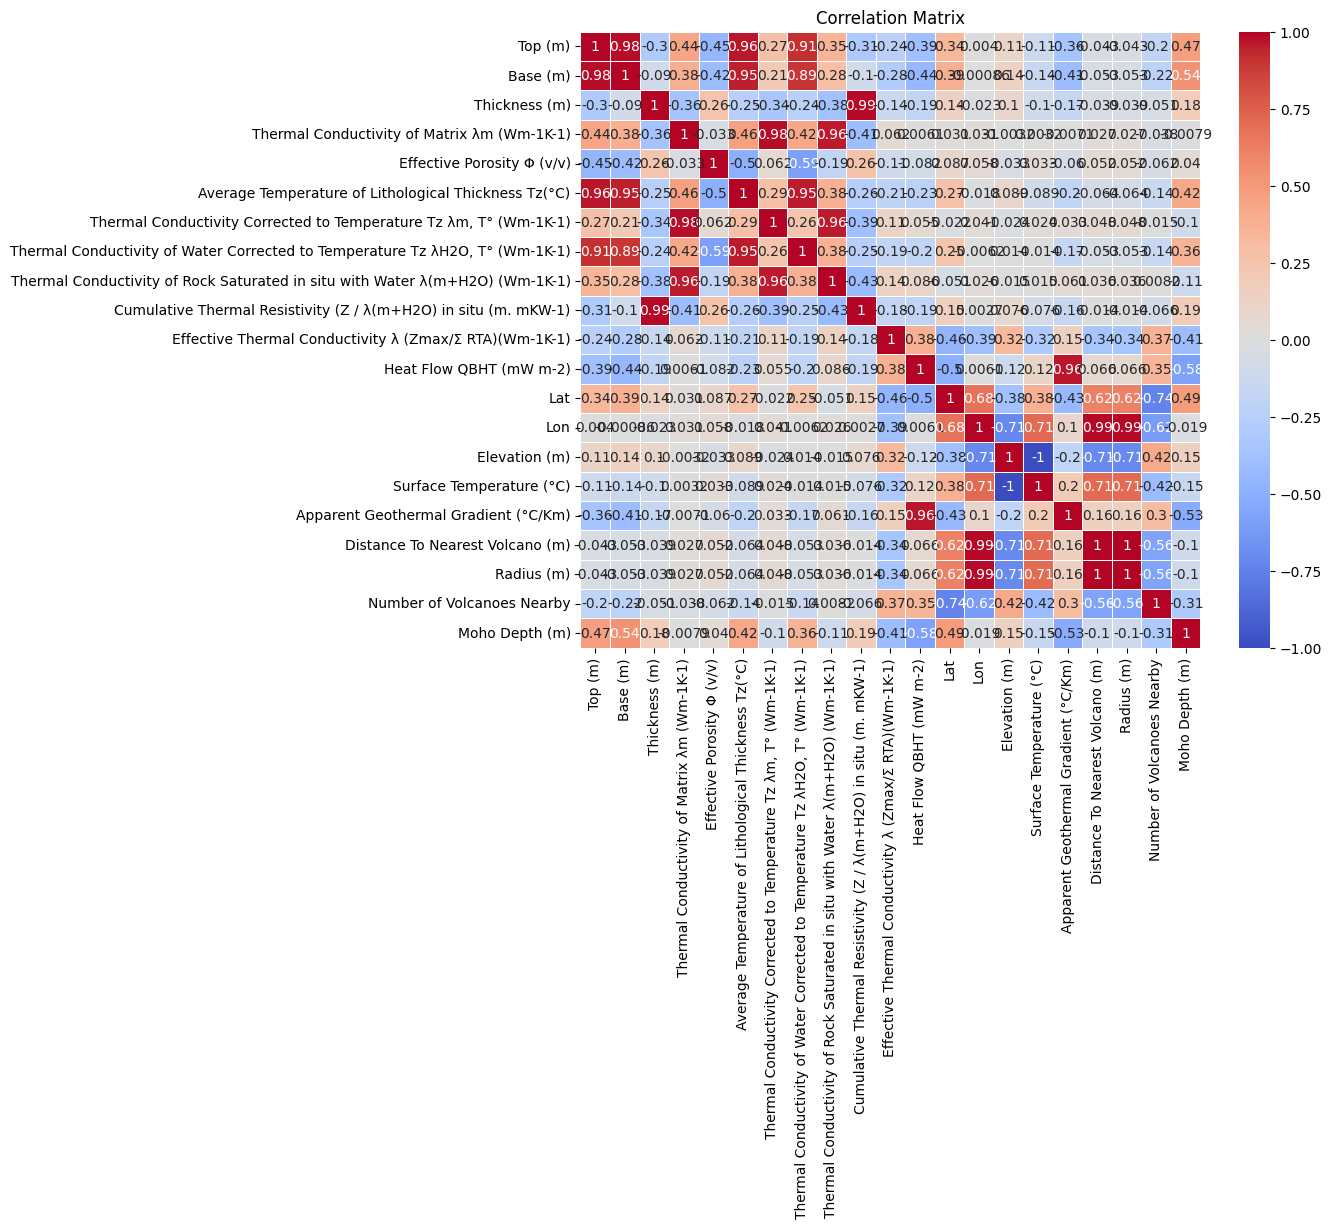

In [340]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the desired columns
selected_columns = ['Top (m)', 'Base (m)', 'Thickness (m)',
       'Thermal Conductivity of Matrix λm (Wm-1K-1)',
       'Effective Porosity Φ (v/v)',
       'Average Temperature of Lithological Thickness Tz(°C)',
       'Thermal Conductivity Corrected to Temperature Tz λm, T° (Wm-1K-1)',
       'Thermal Conductivity of Water Corrected to Temperature Tz λH2O, T° (Wm-1K-1)',
       'Thermal Conductivity of Rock Saturated in situ with Water λ(m+H2O) (Wm-1K-1)',
       'Cumulative Thermal Resistivity (Z / λ(m+H2O) in situ (m. mKW-1)',
       'Effective Thermal Conductivity λ (Zmax/Σ RTA)(Wm-1K-1)',
       'Heat Flow QBHT (mW m-2)', 'Lat', 'Lon', 'Elevation (m)',
       'Surface Temperature (°C)', 'Apparent Geothermal Gradient (°C/Km)',
       'Distance To Nearest Volcano (m)', 'Radius (m)',
       'Number of Volcanoes Nearby', 'Moho Depth (m)']

# Create a DataFrame with the selected columns
selected_data = cleaned_data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


## Box plot for categorical feature (Dominant Lithology)

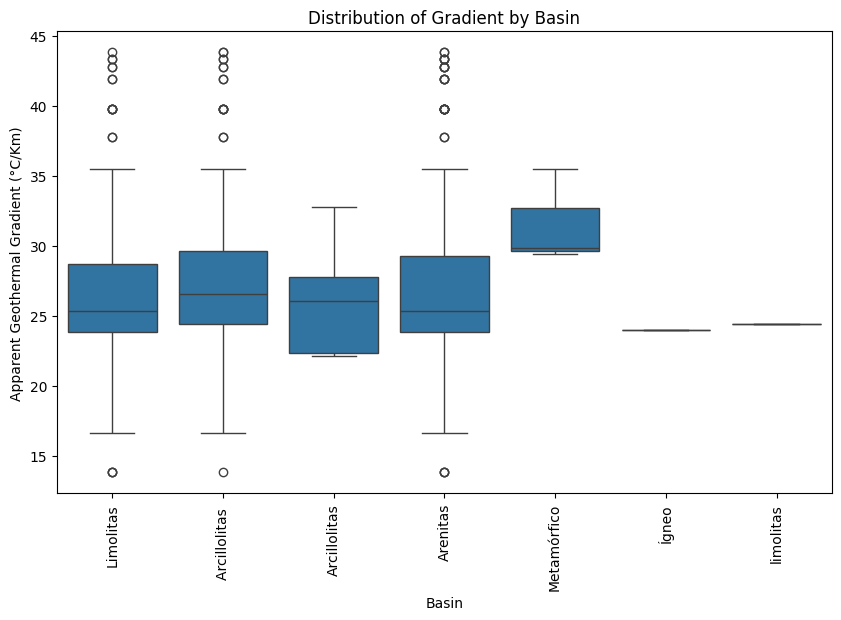

In [341]:
# Create a box plot to visualize the distribution of "Apparent Geothermal Gradient (°C/Km)" by basin
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.boxplot(x='Dominant Lithology', y='Apparent Geothermal Gradient (°C/Km)', data=cleaned_data)
plt.xlabel('Basin')
plt.ylabel('Apparent Geothermal Gradient (°C/Km)')
plt.title('Distribution of Gradient by Basin')
plt.show()

In [342]:
cleaned_data.columns

Index(['UWI', 'Top (m)', 'Base (m)', 'Thickness (m)', 'Dominant Lithology',
       'Thermal Conductivity of Matrix λm (Wm-1K-1)',
       'Effective Porosity Φ (v/v)',
       'Average Temperature of Lithological Thickness Tz(°C)',
       'Thermal Conductivity Corrected to Temperature Tz λm, T° (Wm-1K-1)',
       'Thermal Conductivity of Water Corrected to Temperature Tz λH2O, T° (Wm-1K-1)',
       'Thermal Conductivity of Rock Saturated in situ with Water λ(m+H2O) (Wm-1K-1)',
       'Cumulative Thermal Resistivity (Z / λ(m+H2O) in situ (m. mKW-1)',
       'Effective Thermal Conductivity λ (Zmax/Σ RTA)(Wm-1K-1)',
       'Heat Flow QBHT (mW m-2)', 'Lat', 'Lon', 'Elevation (m)',
       'Surface Temperature (°C)', 'Apparent Geothermal Gradient (°C/Km)',
       'Distance To Nearest Volcano (m)', 'Radius (m)',
       'Number of Volcanoes Nearby', 'Moho Depth (m)'],
      dtype='object')

# Building Machine Learning Algorythm

## Data Splitting

In [343]:
# Define feature matrix (X) and target variables (y)
X = cleaned_data[['Top (m)', 'Base (m)', 'Thickness (m)','Dominant Lithology',
       'Elevation (m)', 'Surface Temperature (°C)', 'Distance To Nearest Volcano (m)',
       'Number of Volcanoes Nearby', 'Moho Depth (m)']]

y = cleaned_data['Apparent Geothermal Gradient (°C/Km)']

# One Hot Encoding for Dominant Lithology
X = pd.get_dummies(X, columns=['Dominant Lithology'], drop_first=True)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Hyperparameter Tuning with Cross-Validation

Manually iterating over hyperparameter combinations and recording the progress using the tqdm library. 

In [344]:
from tqdm import tqdm
import itertools
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search manually with a progress bar
param_grid_combinations = list(ParameterGrid(param_grid))
total_combinations = len(param_grid_combinations)

results = []

with tqdm(total=total_combinations) as pbar:
    for params in param_grid_combinations:
        rf_model.set_params(**params)
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        results.append((params, mse))
        pbar.update()

# Find the best hyperparameters
best_params, best_mse = min(results, key=lambda x: x[1])
print("Best Hyperparameters:", best_params)
print("Best Mean Squared Error:", best_mse)


100%|██████████| 81/81 [00:36<00:00,  2.21it/s]

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Mean Squared Error: 0.09049099609046989


## Train Random Forest and evaluate model

In [345]:
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

Evaluate the model's performance on the test data using appropriate regression metrics (e.g., MAE, RMSE, R-squared).

In [346]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = best_rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [347]:
print(mae)
print(rmse)
print(r2)

0.0921654494678454
0.3008172137535847
0.9964308685538242


MAE represents the average absolute difference between the predicted and actual values. A MAE of 0.5187 suggests that, on average, model's predictions are approximately 0.5187 °C/Km away from the true values. Lower MAE is generally better, but the "goodness" of the value depends on the context and domain knowledge.

RMSE measures the square root of the average squared differences between predicted and actual values. It penalizes larger errors more than MAE. RMSE of 1.2480 indicates that, on average, model's predictions deviate by approximately 1.2480 °C/Km from the true values. Smaller RMSE values are preferred.

R-squared, or the coefficient of determination, represents the proportion of the variance in the dependent variable that's predictable from the independent variables. An R² of 0.9600 suggests that the model explains approximately 96.00% of the variance in the target variable. A higher R² value is desirable, and 0.9600 is generally considered excellent.

# Visualization of results

## Feature Importance Plot

Visualize the importance of each feature in the Random Forest model. This will help to understand which features have the most significant impact on predicting the geothermal gradient.

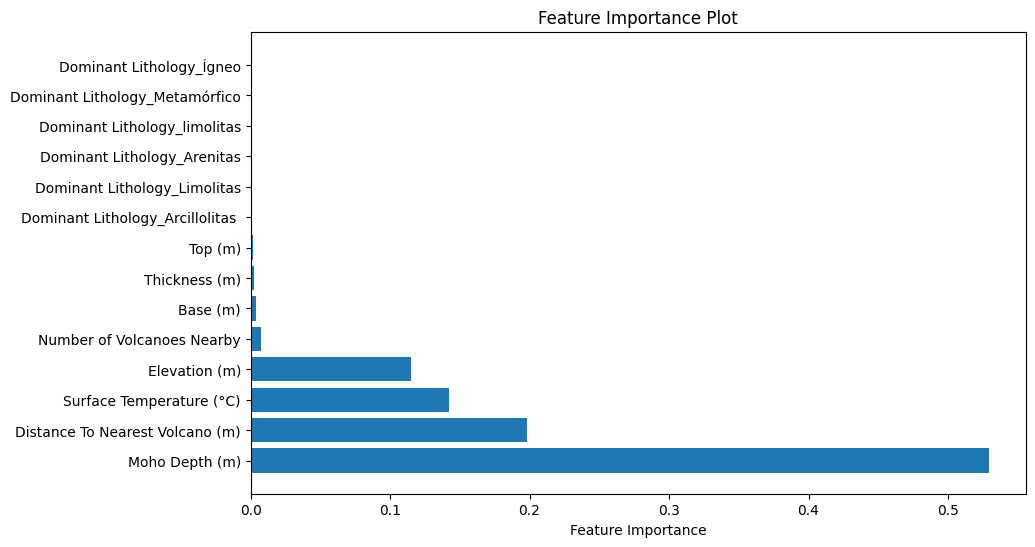

In [348]:
importances = best_rf_model.feature_importances_
feature_names = X.columns

# Sort importances in descending order
sorted_importances = sorted(zip(importances, feature_names), reverse=True)
top_features = [feature for importance, feature in sorted_importances]

plt.figure(figsize=(10, 6))
plt.barh(top_features, [importance for importance, _ in sorted_importances])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()

## Residual Plot

Create a residual plot to check if the model's predictions have a pattern. Most residuals must be near to zero

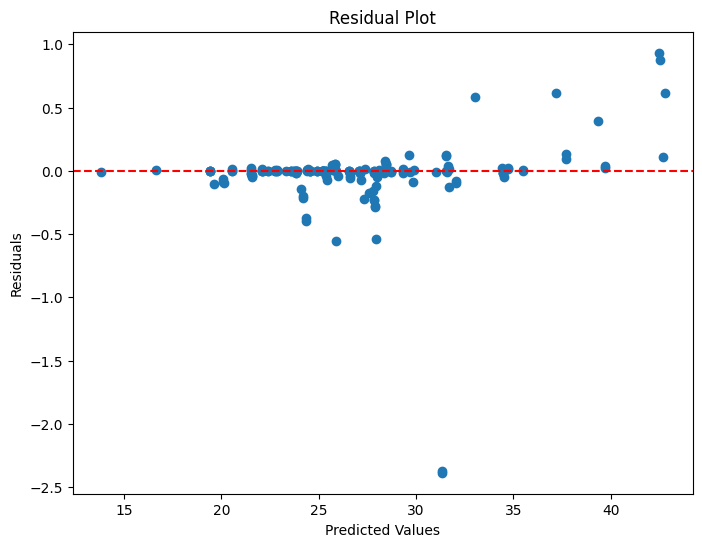

In [349]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.show()

## Actual vs. Predicted Plot

Visualize how model's predictions compare to the actual values.

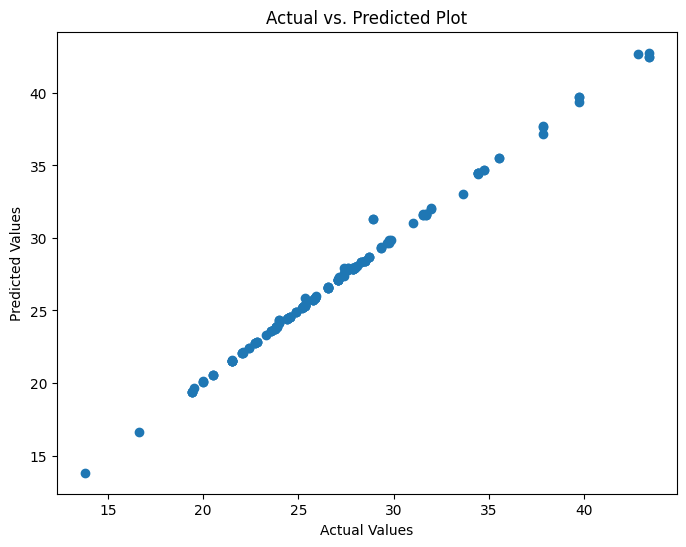

In [350]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Plot')
plt.show()

## Partial Dependency Plots

Understand the relationship between a specific feature and the target while keeping other features constant.

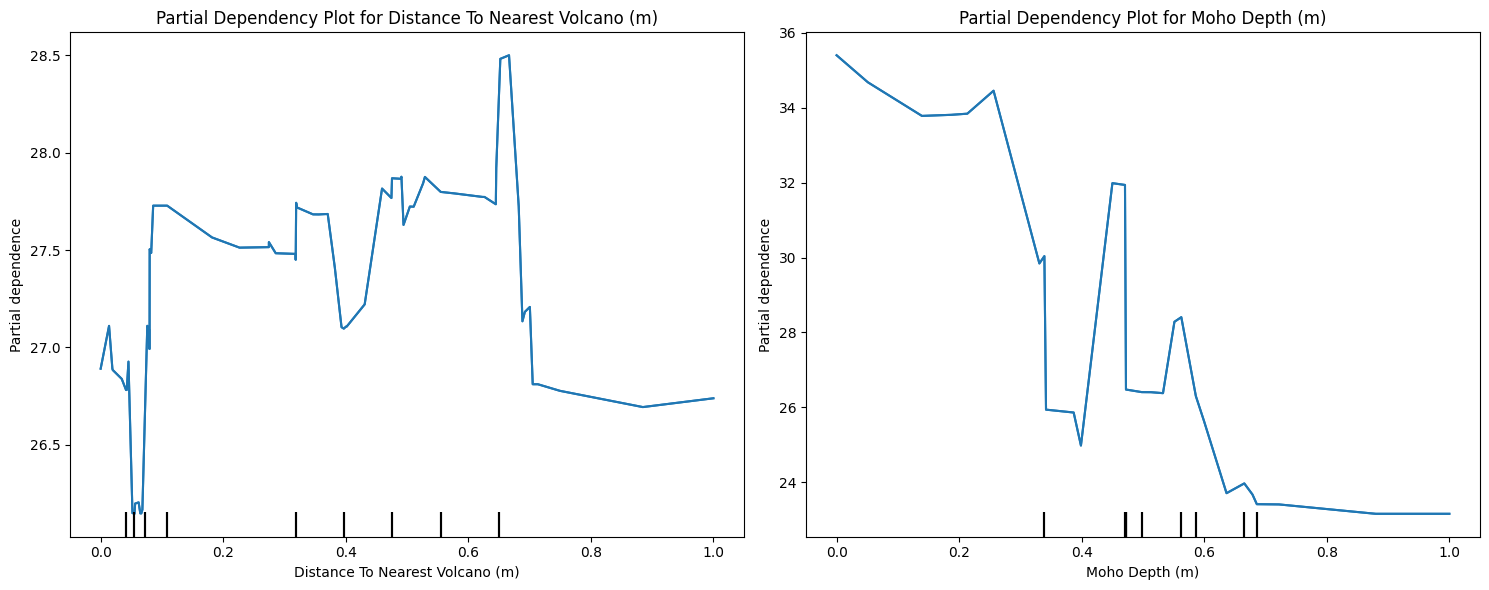

In [351]:
from sklearn.inspection import PartialDependenceDisplay

feature_indices = [X.columns.get_loc("Distance To Nearest Volcano (m)"), X.columns.get_loc("Moho Depth (m)")]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Create a single row with 2 subplots

for i, feature_index in enumerate(feature_indices):
    ax = axes[i]  # Select the appropriate subplot
    display = PartialDependenceDisplay.from_estimator(best_rf_model, X_train, features=[feature_index], ax=ax)
    display.plot(ax=display.axes_)
    ax.set_title(f'Partial Dependency Plot for {X.columns[feature_index]}')

plt.tight_layout()
plt.show()

In [ ]:
# Test